In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = None

path = '../Assets/Resources/Intentions/DataSimulation/Bloc/PostDebug/'
path2 = '-GoodData'

data = pd.read_csv(path + str(0.2) + '-' + str(0.8) + path2 + '.csv', sep = ";", decimal = ',')
#data = pd.read_csv('DataSimulation/4-Cibles-Gilles_SimUnreal.csv', sep = ";")
# data.dropna()

# On regarde un aperçu de la database
data[:5]

Time  3091.191  ContribDistance  0.2  ContribFocus  0.8  PosTargetX  \
0  Time  3091.208  ContribDistance  0.2  ContribFocus  0.8  PosTargetX   
1  Time  3091.226  ContribDistance  0.2  ContribFocus  0.8  PosTargetX   
2  Time  3091.243  ContribDistance  0.2  ContribFocus  0.8  PosTargetX   
3  Time  3091.261  ContribDistance  0.2  ContribFocus  0.8  PosTargetX   
4  Time  3091.278  ContribDistance  0.2  ContribFocus  0.8  PosTargetX   

    0.5364  PosTargetZ  0.5926  ...  OOI_3_Dist  1.956806  OOI_3_Angle  \
0   0.5364  PosTargetZ  0.5926  ...  OOI_3_Dist  1.956806  OOI_3_Angle   
1  -0.3438  PosTargetZ  0.6112  ...  OOI_3_Dist   1.77033  OOI_3_Angle   
2   0.1673  PosTargetZ  0.5742  ...  OOI_3_Dist  1.695816  OOI_3_Angle   
3   0.1671  PosTargetZ  0.5746  ...  OOI_3_Dist  1.695816  OOI_3_Angle   
4   0.1671  PosTargetZ  0.5746  ...  OOI_3_Dist  1.695816  OOI_3_Angle   

   9.733387  OOI_4_weight  0.5057831  OOI_4_Dist  1.932069  OOI_4_Angle  \
0  9.733387  OOI_4_weight  0.4960933  OOI_4_Dist  1.932069  OOI_4_Angle   
1  40.06366  OOI_4_weight  0.3695195  OOI_4_Dist  1.211488  OOI_4_Angle   
2  40.06038  OOI_4_weight  0.3702157  OOI_4_Dist  1.195072  OOI_4_Angle   
3  40.06039  OOI_4_weight  0.3702156  OOI_4_Dist  1.195072  OOI_4_Angle   
4  40.06037  OOI_4_weight  0.3702157  OOI_4_Dist  1.195072  OOI_4_Angle   

   37.68235  
0  37.68235  
1  49.53636  
2  49.53458  
3  49.53458  
4  49.53457  

[5 rows x 92 columns]

In [13]:
data.columns.size

92

In [14]:
list_names = data.columns.values

In [15]:
for i in range(0, math.floor(data.columns.size/2)):
    del data[list_names[2*i]]
    
    data.columns.values[i] = list_names[2*i]
    data.index = data['Time']

In [16]:
del data['Time']

In [17]:
data.columns

Index(['ContribDistance', 'ContribFocus', 'PosTargetX', 'PosTargetZ',
       'PosProxyX', 'PosProxyZ', 'PosCoVR_EncX', 'PosCoVR_EncZ',
       'PosCoVR_OptX', 'PosCoVR_OptZ', 'PosUserX', 'PosUserY', 'PosUserZ',
       'PosHandX', 'PosHandY', 'PosHandZ', 'PosHandOptX', 'PosHandOptY',
       'PosHandOptZ', 'NbTargetInScene', 'TargetToTouch.x', 'TargetToTouch.y',
       'TargetToTouch.z', 'DistUserProxy', 'distUserCoVR', 'distCoVRTarget',
       'distProxyTarget', 'CollUserTarget', 'CoVRinPlace', 'OOI_Picked',
       'OOI_0_weight', 'OOI_0_Dist', 'OOI_0_Angle', 'OOI_1_weight',
       'OOI_1_Dist', 'OOI_1_Angle', 'OOI_2_weight', 'OOI_2_Dist',
       'OOI_2_Angle', 'OOI_3_weight', 'OOI_3_Dist', 'OOI_3_Angle',
       'OOI_4_weight', 'OOI_4_Dist', 'OOI_4_Angle'],
      dtype='object')

In [18]:
data.shape

(44704, 45)

In [25]:
data['DistanceUser_OOI_Picked'] = [float(data['OOI_' + str(data['OOI_Picked'].values[i]) + '_Dist'].values[i]) for i in range(0, data.index.size)]
data['AngleUser_OOI_Picked'] = [float(data['OOI_' + str(data['OOI_Picked'].values[i]) + '_Angle'].values[i]) for i in range(0, data.index.size)]
data['Weight_OOI_Picked'] = [float(data['OOI_' + str(data['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, data.index.size)]

In [26]:
Comparison_Proxy_User = None
Comparison_Proxy_User = pd.DataFrame(index = data.index)
Comparison_Proxy_User['DistUserTarget'] = [float(data['DistanceUser_OOI_Picked'].values[i]) for i in range(0, data.index.size)]
Comparison_Proxy_User['DistProxyTarget01'] = [float(data['distProxyTarget'].values[i]) for i in range(0, data.index.size)]

In [27]:
Comparison_Proxy_User.describe()

DistUserTarget  DistProxyTarget01
count    44704.000000       44704.000000
mean         1.254186           1.225879
std          0.515214           0.471270
min          0.329518           0.266400
25%          0.796319           0.855347
50%          1.224920           1.243452
75%          1.642481           1.586575
max          2.733104           2.755920

In [28]:
data.head()

ContribDistance ContribFocus PosTargetX PosTargetZ PosProxyX  \
Time                                                                    
3091.208             0.2          0.8     0.5364     0.5926    0.4001   
3091.226             0.2          0.8    -0.3438     0.6112    0.3991   
3091.243             0.2          0.8     0.1673     0.5742    0.3985   
3091.261             0.2          0.8     0.1671     0.5746    0.3975   
3091.278             0.2          0.8     0.1671     0.5746    0.3964   

         PosProxyZ PosCoVR_EncX PosCoVR_EncZ PosCoVR_OptX PosCoVR_OptZ  ...  \
Time                                                                    ...   
3091.208    0.2355      -1.2048      -1.6527       0.0000       0.0000  ...   
3091.226    0.2354      -1.2048      -1.6527       0.0000       0.0000  ...   
3091.243    0.2354      -1.2048      -1.6527       0.0000       0.0000  ...   
3091.261    0.2354      -1.2048      -1.6527       0.0000       0.0000  ...   
3091.278    0.2354      -1.2048      -1.6527       0.0000       0.0000  ...   

         OOI_2_Angle OOI_3_weight OOI_3_Dist OOI_3_Angle OOI_4_weight  \
Time                                                                    
3091.208    11.32689            1   1.956806    9.733387    0.4960933   
3091.226    56.97836    0.4678718    1.77033    40.06366    0.3695195   
3091.243    56.97571    0.4699109   1.695816    40.06038    0.3702157   
3091.261    56.97572    0.4699108   1.695816    40.06039    0.3702156   
3091.278    56.97571     0.469911   1.695816    40.06037    0.3702157   

         OOI_4_Dist OOI_4_Angle DistanceUser_OOI_Picked AngleUser_OOI_Picked  \
Time                                                                           
3091.208   1.932069    37.68235                1.956806             9.733387   
3091.226   1.211488    49.53636                1.770330            40.063660   
3091.243   1.195072    49.53458                1.695816            40.060380   
3091.261   1.195072    49.53458                1.695816            40.060390   
3091.278   1.195072    49.53457                1.695816            40.060370   

          Weight_OOI_Picked  
Time                         
3091.208           1.000000  
3091.226           0.467872  
3091.243           0.469911  
3091.261           0.469911  
3091.278           0.469911  

[5 rows x 48 columns]

In [29]:
data['UserXZ'] = [float(data['PosUserZ'].values[i])**2 + float(data['PosUserX'].values[i])**2 for i in range(0, data.index.size)]
data['ProxyXZ'] = [float(data['PosProxyX'].values[i])**2 + float(data['PosProxyZ'].values[i])**2 for i in range(0, data.index.size)]
data['TargetToTouch'] = [float(data['TargetToTouch.x'].values[i])**2 + float(data['TargetToTouch.z'].values[i])**2 for i in range(0, data.index.size)]
data['CollProxy'] = data['ProxyXZ'].values - data['TargetToTouch']
data['CollProxy'] = data['CollProxy'].abs()

data['CoVRPos'] = [float(data['PosCoVR_EncX'].values[i])**2 + float(data['PosCoVR_EncZ'].values[i])**2 for i in range(0, data.index.size)]
data['CollCoVR'] = data['CoVRPos'].values - data['TargetToTouch'].values
data['CollCoVR'] = data['CollProxy'].abs()

data['HandToCoVR'] = [float(data['PosHandX'].values[i])**2 + float(data['PosHandZ'].values[i])**2 - (data['CoVRPos']) for i in range(0, data.index.size)] 


In [30]:
data.index.size

44704

In [33]:
for i in range(1, data.index.size):
    if ((data['CollUserTarget'].values[i] == True) and (data['CollUserTarget'].values[i-1] == False)):
        data['ScatterPointCollision'] = data['UserXZ'].values[i]
    else:
        data['ScatterPointCollision'] = -1
        
    if ((data['CoVRinPlace'].values[i] == True) and (data['CoVRinPlace'].values[i-1] == False)):
        data['ScatterCoVR'] = data['ProxyXZ'].values[i]
    else:
        data['ScatterCoVR'] = -1
        
    if((data['CollUserTarget'].values[i] == True) and (data['CoVRinPlace'].values[i] == True)):
       # and (data['CollUserTarget'].values[i-1] == False)):
        data['CoVRUserMatch'] = 1
    else:
        data['CoVRUserMatch'] = -1
    if ((data['CollProxy'].values[i] <= 0.1)):
        data['ScatterProxInPlace'] = data['TargetToTouch'].values[i]
    else:
        data['ScatterProxInPlace'] = -1
        
#    if ((data['HandToCoVR'].values[i] <= 0.1)):
#        data['ScatterHandCoVR'] = data['CoVRPos'].values[i]
#    else:
#        data['ScatterHandCoVR'] = -1
        
for i in range(1, data.index.size):
    if ((data['CollUserTarget'].values[i] == True) and (data['CollUserTarget'].values[i-1] == False)):
        data['ScatterPointCollision'].values[i] = data['UserXZ'].values[i]
    else:
        data['ScatterPointCollision'].values[i] = -1
        
    if ((data['CoVRinPlace'].values[i] == True) and (data['CoVRinPlace'].values[i-1] == False)):
        data['ScatterCoVR'].values[i] = data['ProxyXZ'].values[i]
    else:
        data['ScatterCoVR'].values[i] = -1
       
    if((data['CollUserTarget'].values[i] == True) and (data['CoVRinPlace'].values[i] == True)):
       # and (data['CollUserTarget'].values[i-1] == False)):
        data['CoVRUserMatch'].values[i] = 1
    else:
        data['CoVRUserMatch'].values[i] = -1
        
for i in range(1, data.index.size):
    if ((data['CollProxy'].values[i] <= 0.1)):
        
        data['ScatterProxInPlace'].values[i] = data['TargetToTouch'].values[i]
    else:
        data['ScatterProxInPlace'].values[i] = -10
        
#for i in range(1, data.index.size):
#    if ((data['HandToCoVR'].values[i] <= 0.1)):
#        
#        data['ScatterHandCoVR'].values[i] = data['CoVRPos'].values[i]
#    else:
#        data['ScatterHandCoVR'].values[i] = -10
        
        

In [34]:
data['ScatterPointCollision'].describe()

count    44704.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: ScatterPointCollision, dtype: float64

In [17]:
data['CoVRUserMatch'].value_counts()

-1    9567
Name: CoVRUserMatch, dtype: int64

    data['ProxyXZ'].describe()

In [18]:
dataPerContrib = None
dataPerContrib = pd.DataFrame()

for i in range(0, 11):
    dataPerContrib['ProxyXZ-' + str(i/10)] = data[data['ContribDistance'] == i/10]['ProxyXZ']
    dataPerContrib['UserXZ-' + str(i/10)] = data[data['ContribDistance'] == i/10]['UserXZ']
    dataPerContrib['CoVRinPlace-' + str(i/10)] = data[data['ContribDistance'] == i/10]['ScatterCoVR']
    dataPerContrib['UserColl-' + str(i/10)] = data[data['ContribDistance'] == i/10]['ScatterPointCollision']
    
    print(min(data[data['ContribDistance'] == i/10]['UserXZ'].shape), i)
#dataPerContrib.head()

0 0
9567 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10


In [40]:
t = data.index

a = data['UserXZ']
b = data['ProxyXZ']
c = data['TargetToTouch']#data['TargetToTouch.x']**2 + data['TargetToTouch.z']**2

k = [float(data['PosHandX'].values[i])**2 + float(data['PosHandZ'].values[i])**2 for i in range(0, data.index.size)]
d = [float(data['PosTargetX'].values[i])**2 + float(data['PosTargetZ'].values[i])**2 for i in range(0, data.index.size)]

l = [int(data['NbTargetInScene'].values[i]) for i in range(0, data.index.size)]
#l = data['ScatterHandCoVR']
m = data['CoVRPos']

fig = plt.figure(1, figsize=(18,5))
plt.plot(t, a, 'b', label = 'User Displacement') # plotting t, a separately 
#plt.plot(t, b, 'b', label = 'Proxy Displacement01') # plotting t, b separately

plt.plot(t, m, 'g', label = 'CoVR Position')
#plt.plot(t, l, 'o', color = 'red', label = 'HandCoVRPos')

plt.plot(t, l, 'o', color = 'red', label = 'NbTargets')

plt.plot(t, k, 'r', label = 'Hand Position')
plt.plot(t, c, 'magenta', label = 'Target to Touch Position')
#plt.plot(t, d, 'y', label = "Proxy's target position based on intentions")

y = data['ScatterPointCollision']
plt.plot(t, y, 'o', color='red', label = "User Colliding");

v = data['ScatterProxInPlace']
plt.plot(t, v, 'o', color='blue', label = "CoVR in Place");

plt.legend(bbox_to_anchor=(0.9, 0.8),
           bbox_transform=plt.gcf().transFigure)

axes = plt.gca()
axes.set_ylim(-0.0)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [20]:
print(data[data['CoVRinPlace'] == True])

            ContribDistance  ContribFocus  PosTargetX  PosTargetZ  PosProxyX  \
Time                                                                           
8.329568                0.1           0.9      0.4947     -0.6693     0.5379   
8.341681                0.1           0.9      0.4947     -0.6693     0.5375   
8.359599                0.1           0.9      0.4947     -0.6693     0.5374   
8.370720                0.1           0.9      0.4947     -0.6693     0.5370   
8.380987                0.1           0.9      0.4947     -0.6693     0.5368   
...                     ...           ...         ...         ...        ...   
123.546700              0.1           0.9      1.0030      0.4649     1.0030   
123.557600              0.1           0.9      1.0030      0.4649     1.0030   
123.569900              0.1           0.9      1.0030      0.4649     1.0030   
123.582500              0.1           0.9      1.0030      0.4649     1.0030   
123.598200              0.1           0.

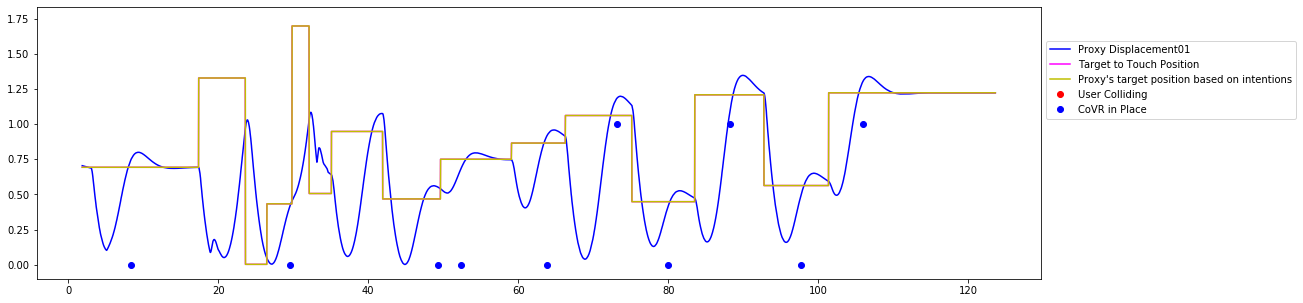

In [21]:
t = data.index

a = data['UserXZ']
b = data['ProxyXZ']
c = data['TargetToTouch']


d = data['PosTargetX']**2 + data['PosTargetZ']**2

fig = plt.figure(1, figsize=(18,5))
#plt.plot(t, a, 'r', label = 'User Displacement') # plotting t, a separately 
plt.plot(t, b, 'b', label = 'Proxy Displacement01') # plotting t, b separately

plt.plot(t, c, 'magenta', label = 'Target to Touch Position')
plt.plot(t, d, 'y', label = "Proxy's target position based on intentions")

y = data['ScatterPointCollision']
plt.plot(t, y, 'o', color='red', label = "User Colliding");

v = data['ScatterCoVR']
plt.plot(t, v, 'o', color='blue', label = "CoVR in Place");

plt.legend(bbox_to_anchor=(0.9, 0.8),
           bbox_transform=plt.gcf().transFigure)

axes = plt.gca()
axes.set_ylim(-0.1)
plt.show()

In [142]:
dataPerContrib = None
dataPerContrib = pd.DataFrame()

for i in range(0, 11):
    cond = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]
    
    cond.replace(cond['ContribDistance'].values, i/10)
    cond.replace(cond['ContribFocus'].values, (1-i/10))
    
    
    dataPerContrib['ProxyXZ-' + str(i/10)] = cond[cond['ContribDistance'] == i/10]['ProxyXZ']
    dataPerContrib['UserXZ-' + str(i/10)] = cond[cond['ContribDistance'] == i/10]['UserXZ']
    dataPerContrib['CoVRinPlace-' + str(i/10)] = cond[cond['ContribDistance'] == i/10]['ScatterCoVR']
    dataPerContrib['UserColl-' + str(i/10)] = cond[cond['ContribDistance'] == i/10]['ScatterPointCollision']
    
    
    #print(min(data[data['ContribDistance'] == i/10]['UserXZ'].shape), i)
#dataPerContrib.head()

KeyboardInterrupt: 

In [138]:
dataPerContrib = None
dataPerContrib = pd.DataFrame()

for i in range(0, 11):
    name = ("dataContrib" + str(i*10) )
    pd.DataFrame(name)
    name['ProxyXZ-' + str(i/10)] = cond[cond['ContribDistance'] == i/10]['ProxyXZ']
name

Empty DataFrame
Columns: [ProxyXZ-1.0]
Index: []

In [157]:
dataPerContrib = None
dataPerContrib = pd.DataFrame()

for i in range(0, 11):
    if( (i == 8) or (i == 9)):
        dataPerContrib['ProxyXZ-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ProxyXZ']
        dataPerContrib['UserXZ-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['UserXZ']
        dataPerContrib['CoVRinPlace-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ScatterCoVR']
        dataPerContrib['UserColl-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ScatterPointCollision']
    else:
        dataPerContrib['ProxyXZ-' + str(i/10)] = data[data['ContribDistance'] == i/10]['ProxyXZ']
        dataPerContrib['UserXZ-' + str(i/10)] = data[data['ContribDistance'] == i/10]['UserXZ']
        dataPerContrib['CoVRinPlace-' + str(i/10)] = data[data['ContribDistance'] == i/10]['ScatterCoVR']
        dataPerContrib['UserColl-' + str(i/10)] = data[data['ContribDistance'] == i/10]['ScatterPointCollision']
    
    print(min(data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ProxyXZ'].shape), i)
#dataPerContrib.head()

41070 0
40827 1
82162 2
82162 3
43183 4
42225 5
42300 6
42543 7
42401 8
85194 9
86166 10


In [162]:
dataPerContrib = None
dataPerContrib = pd.DataFrame()

for i in range(0, 11):
    dataPerContrib['ProxyXZ-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ProxyXZ']
    dataPerContrib['UserXZ-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['UserXZ']
    dataPerContrib['CoVRinPlace-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ScatterCoVR']
    dataPerContrib['UserColl-' + str(i/10)] = data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ScatterPointCollision']
    
    dataTest = dataPerContrib['ProxyXZ-' + str(i/10)]
    print(min(data[(data['ContribDistance'].values > (i/10 - 0.1)) & (data['ContribDistance'].values < (i/10 + 0.1))]['ProxyXZ'].shape), i)

41070 0
40827 1
82162 2
82162 3
43183 4
42225 5
42300 6
42543 7
42401 8
85194 9
86166 10


In [ ]:
for i in range(0, 11):
    fig, axs = plt.subplots(i)
    axs[i].plot(dataPerContrib[])

In [69]:
cond08 = data[(data['ContribDistance'].values > 0.79) & (data['ContribDistance'].values < 0.81)]
#cond08 = data[data['ContribDistance'].values < 0.81
cond08.replace(cond08['ContribDistance'].values, 0.8)
cond08.replace(cond08['ContribFocus'].values, 0.2)

ContribDistance  ContribFocus  PosTargetX  PosTargetZ  PosProxyX  \
Time                                                                         
1689.654              0.8           0.2     -0.7086     -0.2565    -0.7873   
1689.659              0.8           0.2     -0.7191     -0.2568    -0.7874   
1689.664              0.8           0.2     -0.7191     -0.2568    -0.7874   
1689.669              0.8           0.2     -0.7191     -0.2568    -0.7874   
1689.674              0.8           0.2     -0.7191     -0.2568    -0.7875   
1689.679              0.8           0.2     -0.1860     -0.0159    -0.7874   
1689.684              0.8           0.2     -0.1860     -0.0159    -0.7874   
1689.689              0.8           0.2     -0.1860     -0.0159    -0.7872   
1689.694              0.8           0.2     -0.1581      0.0834    -0.7870   
1689.699              0.8           0.2     -0.1581      0.0834    -0.7868   
1689.704              0.8           0.2     -0.1581      0.0834    -0.7865   
1689.709              0.8           0.2     -0.1581      0.0834    -0.7862   
1689.714              0.8           0.2     -0.1581      0.0834    -0.7858   
1689.719              0.8           0.2     -0.1581      0.0834    -0.7853   
1689.724              0.8           0.2     -0.1581      0.0834    -0.7848   
1689.729              0.8           0.2     -0.1581      0.0834    -0.7843   
1689.734              0.8           0.2     -0.1581      0.0834    -0.7837   
1689.739              0.8           0.2     -0.1581      0.0834    -0.7831   
1689.744              0.8           0.2     -0.1581      0.0834    -0.7824   
1689.749              0.8           0.2     -0.1581      0.0834    -0.7816   
1689.754              0.8           0.2     -0.1581      0.0834    -0.7808   
1689.759              0.8           0.2     -0.1581      0.0834    -0.7800   
1689.764              0.8           0.2     -0.1581      0.0834    -0.7791   
1689.769              0.8           0.2     -0.1581      0.0834    -0.7782   
1689.774              0.8           0.2     -0.1581      0.0834    -0.7772   
1689.779              0.8           0.2     -0.1581      0.0834    -0.7762   
1689.784              0.8           0.2     -0.1581      0.0834    -0.7752   
1689.789              0.8           0.2     -0.1581      0.0834    -0.7741   
1689.794              0.8           0.2     -0.1581      0.0834    -0.7729   
1689.799              0.8           0.2     -0.1581      0.0834    -0.7718   
...                   ...           ...         ...         ...        ...   
1908.059              0.8           0.2     -0.6944     -0.2603    -0.8677   
1908.064              0.8           0.2     -0.6944     -0.2603    -0.8678   
1908.069              0.8           0.2     -0.6944     -0.2603    -0.8678   
1908.074              0.8           0.2     -0.6944     -0.2603    -0.8679   
1908.079              0.8           0.2     -0.6944     -0.2603    -0.8679   
1908.084              0.8           0.2     -0.6944     -0.2603    -0.8680   
1908.089              0.8           0.2     -0.6944     -0.2603    -0.8680   
1908.094              0.8           0.2     -0.6944     -0.2603    -0.8680   
1908.099              0.8           0.2     -0.6944     -0.2603    -0.8681   
1908.104              0.8           0.2     -0.6944     -0.2603    -0.8681   
1908.109              0.8           0.2     -0.6944     -0.2603    -0.8682   
1908.114              0.8           0.2     -0.6944     -0.2603    -0.8682   
1908.119              0.8           0.2     -0.6944     -0.2603    -0.8683   
1908.124              0.8           0.2     -0.6944     -0.2603    -0.8683   
1908.129              0.8           0.2     -0.6944     -0.2603    -0.8683   
1908.134              0.8           0.2     -0.6944     -0.2603    -0.8684   
1908.139              0.8           0.2     -0.6944     -0.2603    -0.8684   
1908.144              0.8           0.2     -0.6944     -0.2603    -0.8684   
1908.149              0.8       

In [73]:
# SUBPLOTS FOR i 0 to 1
t = data.index

a = data['UserXZ']
b = data['ProxyXZ']
c = data['TargetToTouch.x']**2 + data['TargetToTouch.z']**2


d = data['PosTargetX']**2 + data['PosTargetZ']**2

fig = plt.figure(1, figsize=(18,5))
plt.plot(t, a, 'r', label = 'User Displacement') # plotting t, a separately 
plt.plot(t, b, 'b', label = 'Proxy Displacement01') # plotting t, b separately

plt.plot(t, c, 'magenta', label = 'Target to Touch Position')
#plt.plot(t, d, 'y', label = "Proxy's target position based on intentions")

y = data['ScatterPointCollision']
plt.plot(t, y, 'o', color='red', label = "User Colliding");

v = data['ScatterCoVR']
plt.plot(t, v, 'o', color='blue', label = "CoVR in Place");

plt.legend(bbox_to_anchor=(0.9, 0.8),
           bbox_transform=plt.gcf().transFigure)

axes = plt.gca()
axes.set_ylim(-0.0)
plt.show()

(41010,)

In [95]:
data[:].values[400000]

array([0.9000001, 0.09999989999999999, -0.514, -0.1689, -0.5369, -0.1531,
       -2.0455, -1.6316, 0.0, 0.0, -0.839, 1.5048, 0.0592, -0.655, 0.8931,
       -0.407, 1.20284, 2.564864, 2.056828, 0.6021920000000001, False,
       True, 2, 0.44502829999999993, 1.209893, 47.51181,
       0.45869440000000006, 1.0152700000000001, 72.77526999999999,
       0.6148263, 0.7316347, 10.51573, 0.3521453, 1.931356,
       42.716409999999996, 0.4170794, 1.2100629999999999, 76.85158,
       0.43228199999999994, 1.08702, 121.3564, 0.4062952, 1.272743,
       75.98016, 0.6987663000000001, 0.36255590000000004,
       47.187940000000005, 1.931356, 42.716409999999996, 0.3521453,
       0.7074256399999999, 0.31170122000000006, -1, -1], dtype=object)